# HMM analysis

This is the notebook related to HMM data analysis. To run this, please uncomment all the cells an press "Run all" button.

In [1]:
# Set the path and input parameters
import os
directory = os.getcwd() # the main directory of the project

# The credentials for the remote cluster
name = "alina"
server = "ecate"

In [2]:
# Importing the libraries and functions
from functions import *


Here we will construct and analyze HMM models retrieved from the alignments. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.
- **Reference Proteome 75%**: the database of protein sequences.
- **Interpro**: the database of protein domains.

## 1. hmmsearch results 

After performing `hmmsearch` against `RP 75%`, we obtain the dataframe `hmmsearch_results_clustal` with the statistics. E-value and score shows the significance of the particular hit, and the region related information (hmm, alignment, envelope) helps in further comparison with the existing HMMs.

In [3]:
# Dataframe of the hmmsearch results
hmmsearch_results_clustal = pd.read_csv("{}/results/hmms/hmmsearch/combined_hmmsearch_results.csv".format(directory))
num_ali = hmmsearch_results_clustal["query_id"].nunique()
num_hmm = hmmsearch_results_clustal["hmm_id"].nunique()
print("The number of generated DisProt-HMMs for the {} alignments: {}".format(num_ali, num_hmm))
hmmsearch_results_clustal.head()

The number of generated DisProt-HMMs for the 1971 alignments: 2536


,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
0,3.200000e-56,198.9,22.5,8.7,8,A1L1Q4,A1L1Q4_1-71,A0A0B2V6M0,9,70,62,777,842,66,770,843,74
1,2.200000e-54,193.0,13.0,6.2,6,A1L1Q4,A1L1Q4_1-71,A0A6P8I9B6,10,65,56,149,204,56,139,208,70
2,1.600000e-50,180.7,2.4,6.5,5,A1L1Q4,A1L1Q4_1-71,A0A369SIK7,4,66,63,1042,1106,65,1039,1110,72
3,4.800000e-48,172.7,9.2,6.0,5,A1L1Q4,A1L1Q4_1-71,A0A094LGK7,4,66,63,763,827,65,759,832,74
4,1.500000e-47,171.1,7.5,5.7,5,A1L1Q4,A1L1Q4_1-71,A0A851CJ44,5,66,62,113,176,64,105,181,77


In [4]:
# # Plot the distribution of hmmsearch hits for each HMM
# plt.figure(figsize=(8, 4))
# sequence_counts = hmmsearch_results_clustal.groupby('hmm_id')['Sequence'].nunique()
# sequence_counts.plot(kind='bar', color='lightcoral', edgecolor='black', width=0.8)
# plt.title('Distribution of proteins found by hmmsearch for each DisProt-HMM')
# plt.xlabel('DisProt-HMM ID')
# plt.ylabel('Number of unique sequences')
# plt.xticks(fontsize=8, rotation=90)
# plt.grid(color='lightgray')
# plt.show()

Here we compare the length of HMM and the corresponding length of the alignment. There can be 3 options: they are equal or one of them longer or shorter than another because of some insertions/deletions of the alignment.

In [5]:
# Compare HMMs and alignments lengths
hmms = len(hmmsearch_results_clustal)
match_hmms = len(hmmsearch_results_clustal[hmmsearch_results_clustal["hmm_length"] == hmmsearch_results_clustal["ali_length"]])
longer_hmms = len(hmmsearch_results_clustal[hmmsearch_results_clustal["hmm_length"] > hmmsearch_results_clustal["ali_length"]])
shorter_hmms = len(hmmsearch_results_clustal[hmmsearch_results_clustal["hmm_length"] < hmmsearch_results_clustal["ali_length"]])

print("The number of instances: {}, from which hmm regions:".format(hmms))
print("- matching the alignment length: {} ({:.2f}%)".format(match_hmms, match_hmms/hmms * 100))
print("- longer than the alignment length: {} ({:.2f}%)".format(longer_hmms, longer_hmms/(hmms - match_hmms) * 100))
print("- shorter than the alignment length: {} ({:.2f}%)".format(shorter_hmms, shorter_hmms/(hmms - match_hmms) * 100))

The number of instances: 5719174, from which hmm regions:
- matching the alignment length: 2809027 (49.12%)
- longer than the alignment length: 1084149 (37.25%)
- shorter than the alignment length: 1825998 (62.75%)


The number of the pairwise alignments matching the length of the alignment and not are more or less equal in proportion **(47,3% and 52,7% respectively)**. Out of non-matching the proportion of the longer HMMs and shorter HMMs is different **(24,3% and 75,7%)**. 

So, mostly we are dealing with the cases where the length of the alignment is longer than the HMM.

In [6]:
# Longer HMMs analysis
longer_clustal = hmmsearch_results_clustal[hmmsearch_results_clustal["hmm_length"] > hmmsearch_results_clustal["ali_length"]]
longer_clustal["hmm_ali_diff"] = longer_clustal["hmm_length"] - longer_clustal["ali_length"]
longer_clustal.head()

/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_24117/1182056126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longer_clustal["hmm_ali_diff"] = longer_clustal["hmm_length"] - longer_clustal["ali_length"]


,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length,hmm_ali_diff
497,1.600000e-43,158.2,8.7,5.7,5,A1L1Q4,A1L1Q4_1-71,A0A8C3KS93,15,65,51,720,769,50,711,772,62,1
648,1.300000e-42,155.4,5.4,5.9,5,A1L1Q4,A1L1Q4_1-71,A0A8B9G982,15,65,51,874,923,50,865,927,63,1
655,1.600000e-42,155.0,8.1,5.9,5,A1L1Q4,A1L1Q4_1-71,A0A669PJS4,15,65,51,784,833,50,775,838,64,1
682,2.500000e-42,154.4,7.9,6.0,5,A1L1Q4,A1L1Q4_1-71,A0A8C2TMQ7,15,65,51,767,816,50,758,821,64,1
707,6.200000e-42,153.2,8.4,5.8,5,A1L1Q4,A1L1Q4_1-71,A0A669PLJ2,15,65,51,717,766,50,708,769,62,1


In [7]:
# Shorter HMMs analysis
shorter_clustal = hmmsearch_results_clustal[hmmsearch_results_clustal["hmm_length"] < hmmsearch_results_clustal["ali_length"]]
shorter_clustal["hmm_ali_diff"] = shorter_clustal["ali_length"] - shorter_clustal["hmm_length"]
shorter_clustal.head()

/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_24117/554780515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_clustal["hmm_ali_diff"] = shorter_clustal["ali_length"] - shorter_clustal["hmm_length"]


,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length,hmm_ali_diff
0,3.200000e-56,198.9,22.5,8.7,8,A1L1Q4,A1L1Q4_1-71,A0A0B2V6M0,9,70,62,777,842,66,770,843,74,4
2,1.600000e-50,180.7,2.4,6.5,5,A1L1Q4,A1L1Q4_1-71,A0A369SIK7,4,66,63,1042,1106,65,1039,1110,72,2
3,4.800000e-48,172.7,9.2,6.0,5,A1L1Q4,A1L1Q4_1-71,A0A094LGK7,4,66,63,763,827,65,759,832,74,2
4,1.500000e-47,171.1,7.5,5.7,5,A1L1Q4,A1L1Q4_1-71,A0A851CJ44,5,66,62,113,176,64,105,181,77,2
5,1.800000e-47,170.9,8.1,6.1,5,A1L1Q4,A1L1Q4_1-71,A0A3Q0H1V5,5,67,63,852,916,65,848,920,73,2


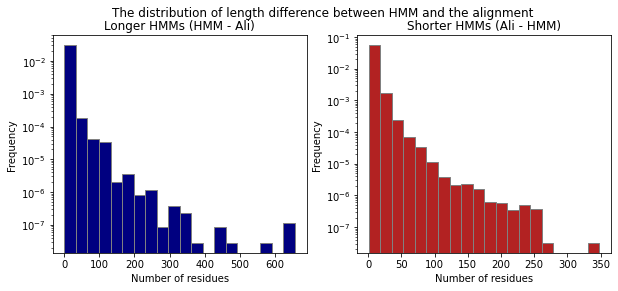

In [8]:
# Plot the histogram of residues difference distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(longer_clustal["hmm_ali_diff"], bins=20, color="navy", edgecolor="gray", density=True)
ax2.hist(shorter_clustal["hmm_ali_diff"], bins=20, color="firebrick", edgecolor="gray", density=True)

plt.suptitle("The distribution of length difference between HMM and the alignment")
ax1.set_title("Longer HMMs (HMM - Ali)")
ax2.set_title("Shorter HMMs (Ali - HMM)")
ax1.set_xlabel("Number of residues")
ax2.set_xlabel("Number of residues")
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Frequency")
ax1.set_yscale("log")
ax2.set_yscale("log")
plt.show()

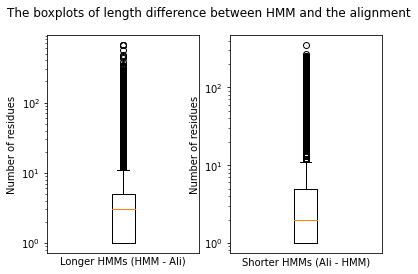

In [9]:
# Plot the boxplot of residues difference distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
box1 = ax1.boxplot(longer_clustal["hmm_ali_diff"])
box2 = ax2.boxplot(shorter_clustal["hmm_ali_diff"])
plt.suptitle("The boxplots of length difference between HMM and the alignment")
ax1.set_xlabel("Longer HMMs (HMM - Ali)")
ax2.set_xlabel("Shorter HMMs (Ali - HMM)")
ax1.set_ylabel("Number of residues")
ax2.set_ylabel("Number of residues")
ax1.set_xticks(ax1.get_xticks()[1:])
ax2.set_xticks(ax2.get_xticks()[1:])
ax1.set_yscale("log")
ax2.set_yscale("log")
plt.show()

In [10]:
# Calculate the outliers proportion in the data frames
threshold_long = box1["whiskers"][1].get_ydata()[1]
threshold_short = box2["whiskers"][1].get_ydata()[1]
long_outl = len(longer_clustal[longer_clustal["hmm_ali_diff"] >= threshold_long])
short_outl = len(shorter_clustal[shorter_clustal["hmm_ali_diff"] >= threshold_short])

print("Outliers in the longer HMMs (more than {} residues): {:.1f}%".format(int(threshold_long), long_outl/longer_hmms * 100))
print("Outliers in the shorter HMMs (more than {} residues): {:.1f}%".format(int(threshold_short), short_outl/shorter_hmms * 100))

Outliers in the longer HMMs (more than 11 residues): 10.1%
Outliers in the shorter HMMs (more than 11 residues): 10.2%


Retrieving outliers is an important step in our case. Since we cannot use fields `hmm_from/hmm_to` as it doesn't capture the actual position, we need to analyse if the `ali_from/ali_to` are the reliable fields. In case the difference between HMMs and the alignments is huge, we need to find a solution. If the difference is not so big in general, we can rely on the alignment information from the `hmmsearch` results.

Thus, obtaining about 10% of instances with a huge difference between HMMs and the alignments, we can use the `ali_from/ali_to` columns for the further comparison with Pfam.

## 2. HMM and Pfam comparison

We took the results of `hmmsearch` and performed a search against Interpro database. Thus we obtained the Pfam domains corresponding to the results from `hmmsearch`.

In the following dataframes I directly compared two models: Pfam-HMM and DisProt-HMM. 

3 types of overlap were calculated:
- the common part divided by **Pfam-HMM** length (`overl_pfam`)
- the common part divided by **DisProt-HMM** length (`overl_hmm`)
- and the overall overlap: the common part divided by the **maximum length** combined by Pfam-HMM and DisProt-HMM lengths together (`overl_perc`).

The column `overlap_sym` serves as a quality estimator. If it's less or equal than one, then we calculated the other kinds of overlap correctly.

In [11]:
# Load a dataframe of Pfam regions
pfam_clustal = pd.read_csv("{}/results/pfam/pfam_overlap/pfam_disprot.csv".format(directory))
num_proteins = pfam_clustal["query_id"].nunique()
num_disprot_hmms = pfam_clustal["hmm_id"].nunique()
print("The number of unique DisProt-HMMs for the {} alignments: {}".format(num_proteins, num_disprot_hmms))
pfam_clustal.head()

The number of unique DisProt-HMMs for the 1697 alignments: 2153


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
0,A0A010Q2P2,PF01336,IPR004365,187,267,81,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,179,0.00,0.00
1,A0A010Q2P2,PF04057,IPR007199,7,109,103,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,161,0.00,0.00
2,A0A010Q2P2,PF08646,IPR013955,452,597,146,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,774,0.00,0.00
3,A0A010Q2P2,PF16900,IPR031657,296,393,98,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,414,0.00,0.00
4,A0A010Q304,PF02775,IPR011766,499,646,148,P07342,P07342_580-595,1,16,...,16,583,598,16,16,10.81,100.0,133,10.81,19.51


Each row correspond to a particular **pairwise alignment** of the protein of the HMM model and each of the subject sequence.

In [12]:
# Check if there are any duplicates of the pairwise alignments
duplicates = pfam_clustal[pfam_clustal.duplicated(keep=False)]
duplicates

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym


### 2.1 Distribution analysis

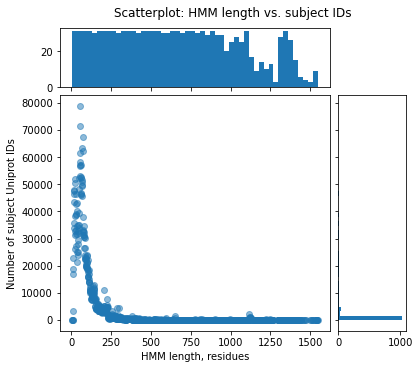

In [13]:
# Scatter plot of HMM length and subject IDs
hmmlen_unid = pfam_clustal.groupby("hmm_length")["uniprot_id"].nunique()

fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(hmmlen_unid.index, hmmlen_unid.values, alpha=0.5, cmap="Blues")
ax_histx.hist(hmmlen_unid.index, bins=50)
ax_histy.hist(hmmlen_unid.values, bins=50, orientation="horizontal")

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("Number of subject Uniprot IDs")
fig.suptitle("Scatterplot: HMM length vs. subject IDs", y=0.95)

plt.show()

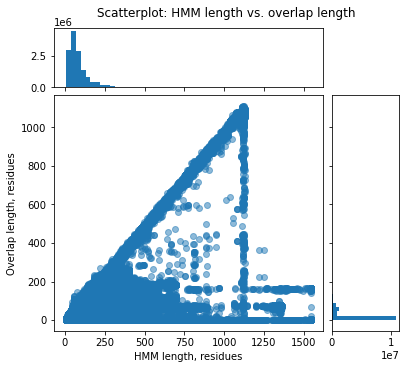

In [14]:
# Scatter plot of HMM length and overlap length - total
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(pfam_clustal['hmm_length'], pfam_clustal['overl_len'], alpha=0.5, cmap='Blues')
ax_histx.hist(pfam_clustal['hmm_length'], bins=50)
ax_histy.hist(pfam_clustal['overl_len'], bins=50, orientation='horizontal')

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("Overlap length, residues")
fig.suptitle("Scatterplot: HMM length vs. overlap length", y=0.95)

plt.show()

In [15]:
# Full overlap: more than 85%
full_overlap = pfam_clustal[pfam_clustal['overl_perc'] > 85]
print("The number of pairwise alignments for fully overlapped HMMs: {}".format(len(full_overlap)))
print("The number of unique HMMs: {}".format(full_overlap['hmm_id'].nunique()))
full_overlap.head()

The number of pairwise alignments for fully overlapped HMMs: 1025372
The number of unique HMMs: 309


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
17,A0A010Q4L3,PF00258,IPR008254,417,550,134,Q9SUM3,Q9SUM3_73-303,30,163,...,124,398,573,176,122,91.04,98.39,15,89.71,94.57
28,A0A010Q4M5,PF00628,IPR019787,468,512,45,P29375,P29375_184-360,113,161,...,49,465,526,62,45,100.00,91.84,5,91.84,95.74
46,A0A010Q991,PF00240,IPR000626,1,41,41,E6PBU9,E6PBU9_1-71,34,71,...,43,1,43,43,41,100.00,95.35,3,95.35,97.62
91,A0A010QEM9,PF13499,IPR002048,92,160,69,P02628,P02628_1-108,36,106,...,73,72,162,91,69,100.00,94.52,5,94.52,97.18
94,A0A010QEM9,PF13499,IPR002048,92,160,69,P02619,P02619_1-107,34,106,...,77,72,162,91,69,100.00,89.61,9,89.61,94.52


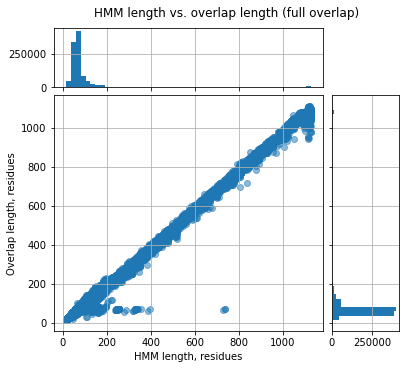

In [16]:
# 1. Scatterplot of HMM length and overlap length - full overlap
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(full_overlap['hmm_length'], full_overlap['overl_len'], alpha=0.5, cmap='Blues')
ax_histx.hist(full_overlap['hmm_length'], bins=50)
ax_histy.hist(full_overlap['overl_len'], bins=50, orientation='horizontal')

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("Overlap length, residues")
fig.suptitle("HMM length vs. overlap length (full overlap)", y=0.95)
ax.grid()
ax_histx.grid()
ax_histy.grid()

plt.show()

In [17]:
# Partial overlap: more than 15% and less than 79%
partial_overlap = pfam_clustal[(pfam_clustal['overl_perc'] > 15) & (pfam_clustal['overl_perc'] < 85)]
print("The number of pairwise alignments for fully overlapped HMMs: {}".format(len(partial_overlap)))
print("The number of unique HMMs: {}".format(partial_overlap['hmm_id'].nunique()))
partial_overlap.head()

The number of pairwise alignments for fully overlapped HMMs: 2138524
The number of unique HMMs: 1042


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
11,A0A010Q401,PF05739,IPR000727,283,332,50,P32867,P32867_192-265,2,74,...,73,247,320,74,38,76.00,52.05,48,44.71,61.79
12,A0A010Q401,PF05739,IPR000727,283,332,50,P39926,P39926_196-269,2,74,...,73,247,320,74,38,76.00,52.05,48,44.71,61.79
31,A0A010Q4M5,PF00628,IPR019787,1331,1374,44,P36106,P36106_1-232,28,102,...,72,1288,1390,103,44,100.00,61.11,29,61.11,75.86
32,A0A010Q650,PF00957,IPR042855,31,117,87,O70480,O70480_47-117,5,71,...,67,29,98,70,67,77.01,100.00,21,77.01,87.01
33,A0A010Q650,PF00957,IPR042855,31,117,87,P33328,P33328_1-91,2,89,...,96,1,97,97,67,77.01,69.79,50,57.76,73.22


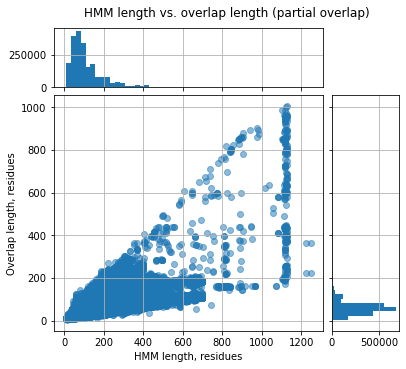

In [18]:
# 2. Scatterplot of HMM length and overlap length - partial overlap
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(partial_overlap["hmm_length"], partial_overlap["overl_len"], alpha=0.5, cmap="Blues")
ax_histx.hist(partial_overlap["hmm_length"], bins=50)
ax_histy.hist(partial_overlap["overl_len"], bins=50, orientation='horizontal')

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("Overlap length, residues")
fig.suptitle("HMM length vs. overlap length (partial overlap)", y=0.95)
ax.grid()
ax_histx.grid()
ax_histy.grid()

plt.show()

In [19]:
# No overlap: less than 15%
no_overlap = pfam_clustal[pfam_clustal['overl_perc'] < 15]
print("The number of pairwise alignments for fully overlapped HMMs: {}".format(len(no_overlap)))
print("The number of unique HMMs: {}".format(no_overlap['hmm_id'].nunique()))
no_overlap.head()

The number of pairwise alignments for fully overlapped HMMs: 10954538
The number of unique HMMs: 2142


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
0,A0A010Q2P2,PF01336,IPR004365,187,267,81,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,179,0.00,0.00
1,A0A010Q2P2,PF04057,IPR007199,7,109,103,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,161,0.00,0.00
2,A0A010Q2P2,PF08646,IPR013955,452,597,146,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,774,0.00,0.00
3,A0A010Q2P2,PF16900,IPR031657,296,393,98,Q1K7R9,Q1K7R9_111-173,1,55,...,55,111,173,63,0,0.00,0.0,414,0.00,0.00
4,A0A010Q304,PF02775,IPR011766,499,646,148,P07342,P07342_580-595,1,16,...,16,583,598,16,16,10.81,100.0,133,10.81,19.51


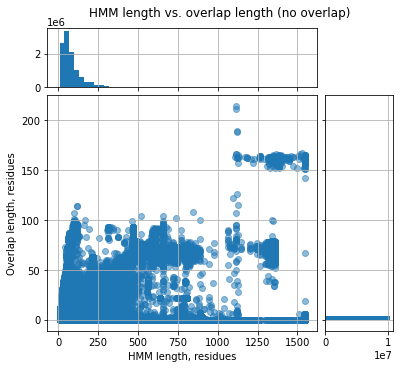

In [20]:
# 3. Scatterplot of HMM length and overlap length - no overlap
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(no_overlap["hmm_length"], no_overlap["overl_len"], alpha=0.5, cmap="Blues")
ax_histx.hist(no_overlap["hmm_length"], bins=50)
ax_histy.hist(no_overlap["overl_len"], bins=50, orientation="horizontal")

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("Overlap length, residues")
fig.suptitle("HMM length vs. overlap length (no overlap)", y=0.95)
ax.grid()
ax_histx.grid()
ax_histy.grid()

plt.show()

Across all three plots, it is evident that for HMMs with a length of about 1100 residues, the variance is higher.
Let’s further examine the models within a range close to this value (I chose the range 1090-1110).

In [21]:
pfam_clustal[(pfam_clustal['hmm_length'] > 1090) & (pfam_clustal['hmm_length'] < 1110)]['pfam_id'].unique()

array(['PF00063', 'PF01576', 'PF02736', 'PF13934', 'PF16687', 'PF07679',
       'PF00533', 'PF12820', 'PF00575'], dtype=object)

In [22]:
pfam_clustal[(pfam_clustal['hmm_length'] > 1090) 
             & (pfam_clustal['hmm_length'] < 1110) 
             & (pfam_clustal['pfam_id'] == 'PF01576') 
             & (pfam_clustal['overl_perc'] != 0)].head()

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,query_id,hmm_id,hmm_from,hmm_to,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
620326,A0A0L8FXW0,PF01576,IPR002928,737,1814,1078,Q9BE39,Q9BE39_807-1935,5,1113,...,1108,701,1827,1127,1076,99.81,97.11,35,96.94,98.44
668979,A0A0N4U0S1,PF01576,IPR002928,854,1913,1060,Q9BE39,Q9BE39_807-1935,2,1097,...,1113,815,1935,1121,1060,100.00,95.24,54,95.24,97.56
829049,A0A0V0YCF0,PF01576,IPR002928,848,1923,1076,Q9BE39,Q9BE39_807-1935,4,1100,...,1091,812,1924,1113,1058,98.33,96.98,52,95.40,97.65
837253,A0A0V1BX54,PF01576,IPR002928,848,1942,1095,Q9BE39,Q9BE39_807-1935,4,1101,...,1111,812,1944,1133,1078,98.45,97.03,51,95.57,97.73
1063282,A0A1A6GCZ9,PF01576,IPR002928,751,1824,1074,Q9BE39,Q9BE39_807-1935,31,1124,...,1090,728,1835,1108,1074,100.00,98.53,17,98.53,99.26


In [23]:
# Create the data frame of MSA length
hmm_ids = []
msa_lengths = [] # the number of sequences in the MSA
msa_residues = [] # the number of amino acids in the MSA

dir_hmm = "{}/results/hmms/hmmbuild/".format(directory)
hmmbuild_files = [file for file in os.listdir(dir_hmm) if file.endswith(".hmm")]

for file_name in hmmbuild_files:
    file_path = os.path.join(dir_hmm, file_name)

    with open(file_path, "r") as file:
        content = file.read()

        pattern = re.compile(r"NAME\s+(\S+)\s*\n.*\bLENG\s*(\d+)\b.*\bNSEQ\s*(\d+)\b", re.DOTALL)
        matches = pattern.findall(content)

        for name, nseq_value, leng_value in matches:
            hmm_ids.append(name.strip())
            msa_residues.append(int(nseq_value))
            msa_lengths.append(int(leng_value))

msa_df = pd.DataFrame({"hmm_id": hmm_ids, "msa_len": msa_lengths, "msa_res": msa_residues})
msa_df = pd.merge(msa_df, pfam_clustal[["hmm_id", "hmm_length"]], on="hmm_id", how="left")
msa_df["hmm_length"] = msa_df["hmm_length"].fillna(0).astype(int)
msa_df.head()

,hmm_id,msa_len,msa_res,hmm_length
0,P08514_989-1039,193,50,42
1,P08514_989-1039,193,50,42
2,P08514_989-1039,193,50,42
3,P08514_989-1039,193,50,42
4,P08514_989-1039,193,50,42


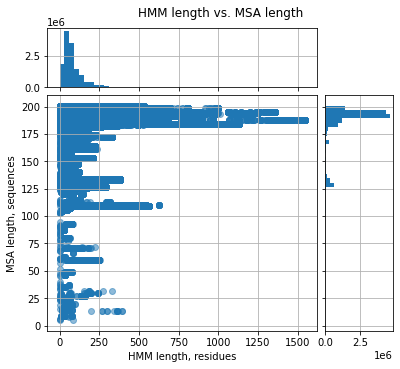

In [24]:
# Scatterplot of MSA length and HMM length
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(msa_df["hmm_length"], msa_df["msa_len"], alpha=0.5, cmap="Blues")
ax_histx.hist(msa_df["hmm_length"], bins=50)
ax_histy.hist(msa_df["msa_len"], bins=50, orientation="horizontal")

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlabel("HMM length, residues")
ax.set_ylabel("MSA length, sequences")
fig.suptitle("HMM length vs. MSA length", y=0.95)
ax.grid()
ax_histx.grid()
ax_histy.grid()

plt.show()

### 2.2 DisProt-HMMs vs Pfam-HMMs: overlap analysis

We focus on 4 types of instances:

1. DisProt-HMMs fully overlap Pfam-HMMs;
2. DisProt-HMMs partially overlap Pfam-HMMs;
3. DisProt-HMMs do not overlap Pfam-HMMs;
4. No Pfam-HMMs were found for the DisProt-HMMs.

In [25]:
# Print the models based on the type of overlap
print("Total: {} models".format(pfam_clustal["hmm_id"].nunique()))
print("- Fully overlapping: {} models".format(full_overlap["hmm_id"].nunique()))
print("- Partially overlapping: {} models".format(partial_overlap["hmm_id"].nunique()))
print("- No overlapping: {} models".format(no_overlap["hmm_id"].nunique()))

Total: 2153 models
- Fully overlapping: 309 models
- Partially overlapping: 1042 models
- No overlapping: 2142 models


The number of full overlap: 309
The number of partial overlap: 1042
The number of no overlap: 2142 



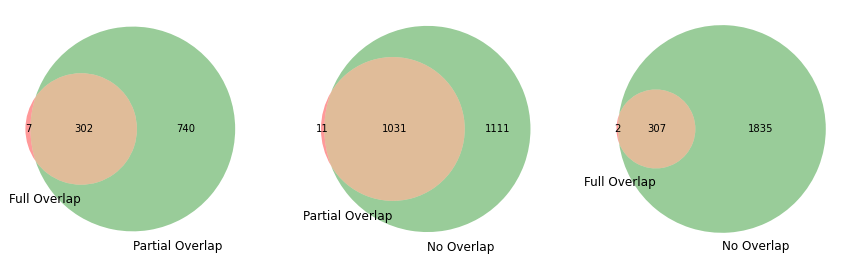

In [26]:
# Plot Venn diagrams of overlapping sets
full_overlap_ids = set(full_overlap["hmm_id"])
partial_overlap_ids = set(partial_overlap["hmm_id"])
no_overlap_ids = set(no_overlap["hmm_id"])

diff_full_partial = np.setdiff1d(list(full_overlap_ids), list(partial_overlap_ids))
diff_partial_full = np.setdiff1d(list(partial_overlap_ids), list(full_overlap_ids))

diff_partial_no = np.setdiff1d(list(partial_overlap_ids), list(no_overlap_ids))
diff_no_partial = np.setdiff1d(list(no_overlap_ids), list(partial_overlap_ids))

diff_full_no = np.setdiff1d(list(full_overlap_ids), list(no_overlap_ids))
diff_no_full = np.setdiff1d(list(no_overlap_ids), list(full_overlap_ids))

print("The number of full overlap: {}".format(len(full_overlap_ids)))
print("The number of partial overlap: {}".format(len(partial_overlap_ids)))
print("The number of no overlap: {} \n".format(len(no_overlap_ids)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
venn2([full_overlap_ids, partial_overlap_ids], ('Full Overlap', 'Partial Overlap'), ax=axes[0])
venn2([partial_overlap_ids, no_overlap_ids], ('Partial Overlap', 'No Overlap'), ax=axes[1])
venn2([full_overlap_ids, no_overlap_ids], ('Full Overlap', 'No Overlap'), ax=axes[2])

plt.show()

In [27]:
# diff_partial_no

In [28]:
# partial_overlap[partial_overlap['hmm_id'] == 'P47710_1-185']

In [29]:
# pfam_clustal[pfam_clustal['hmm_id'].isin(diff_full_partial)].head()

In [30]:
# Retrieve the new instances for which Pfam IDs were not found
hmm_path = "{}/results/hmms/hmmbuild".format(directory)

disprot_hmm_generated = [name.split(".hmm")[0] for name in os.listdir(hmm_path) 
                             if os.path.isfile(os.path.join(hmm_path, name))] # number of generated HMMs
disprot_hmm_hmmsearch = hmmsearch_results_clustal["hmm_id"].unique() # number of HMMs found in RP 75%
disprot_hmm_interpro = pfam_clustal["hmm_id"].unique() # number of HMMs for which Pfam domain was found

non_intersecting_instances_new = len(np.setdiff1d(disprot_hmm_generated, disprot_hmm_hmmsearch)) # generated vs hmmsearch
non_intersecting_instances_hmmsearch = len(np.setdiff1d(disprot_hmm_hmmsearch, disprot_hmm_interpro)) # hmmsearch vs pfam

print("The number of generated DisProt-HMMs: {}".format(len(disprot_hmm_generated)))
print("The number of found DisProt-HMMs by hmmsearch: {}".format(len(disprot_hmm_hmmsearch)))
print("The number of DisProt-HMMs for which Pfam domains were found: {}".format(len(disprot_hmm_interpro)))

The number of generated DisProt-HMMs: 3143
The number of found DisProt-HMMs by hmmsearch: 2536
The number of DisProt-HMMs for which Pfam domains were found: 2153


In [31]:
# Calculate the number of new instances and those non-overlapping with Pfam
print("The number of new DisProt-HMMs: {} ({:.1f}%) from generated {} models".format(
    non_intersecting_instances_new, 
    non_intersecting_instances_new/len(disprot_hmm_generated) * 100,
    len(disprot_hmm_generated)))
print("The number of DisProt-HMMs without Pfam domains found: {} ({:.1f}%) from found {} models in RP 75%".format(
    non_intersecting_instances_hmmsearch, 
    non_intersecting_instances_hmmsearch/len(disprot_hmm_hmmsearch) * 100,
    len(disprot_hmm_hmmsearch)))
print("New DisProt-HMMs, total: {} ({:.1f}%) from generated {} models".format(
    non_intersecting_instances_new + non_intersecting_instances_hmmsearch,
    (non_intersecting_instances_new + non_intersecting_instances_hmmsearch)/len(disprot_hmm_generated) * 100, 
    len(disprot_hmm_generated)))

The number of new DisProt-HMMs: 607 (19.3%) from generated 3143 models
The number of DisProt-HMMs without Pfam domains found: 383 (15.1%) from found 2536 models in RP 75%
New DisProt-HMMs, total: 990 (31.5%) from generated 3143 models


### 2.3 Analysis of new models (not found in InterPro)
In this part we will compare the number of generated DisProt HMMs, those found by hmmsearch and having overlap with Pfam-HMMs (383 models).

In [43]:
# Take a look at the new instances
new_hmms = np.setdiff1d(disprot_hmm_hmmsearch, disprot_hmm_interpro)

print("The number of unique HMM found: {}".format(len(new_hmms)))
print("The number of unique alignments found: {}".format(len(hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_id'].isin(new_hmms)])))

new_hmms_df = hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_id'].isin(new_hmms)]
new_hmms_df.head()

The number of unique HMM found: 383
The number of unique alignments found: 66086


,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
82049,0.000001,40.7,35.2,15.4,16,A8AZZ3,A8AZZ3_24-44,A0A4D8ZYS5,4,16,13,156,169,14,156,169,14
82110,0.000008,37.6,2.0,2.7,1,A8AZZ3,A8AZZ3_116-134,T0TT01,1,19,19,126,144,19,126,144,19
82111,0.000089,34.2,3.2,3.3,2,A8AZZ3,A8AZZ3_116-134,E1M9P6,1,19,19,120,138,19,120,138,19
82112,0.000710,31.3,0.6,2.0,1,A8AZZ3,A8AZZ3_116-134,E1LNB5,2,19,18,149,166,18,148,166,19
82113,0.001100,30.7,3.4,2.3,1,A8AZZ3,A8AZZ3_116-134,E7S8K8,1,19,19,127,145,19,127,145,19


/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_24117/1435878552.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


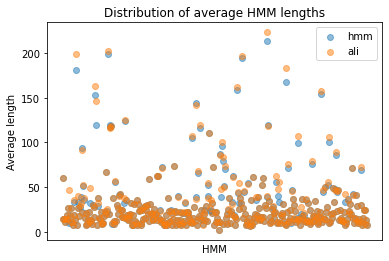

In [64]:
grouped_hmm_length = new_hmms_df.groupby('hmm_id')['hmm_length'].mean()
grouped_ali_length = new_hmms_df.groupby('hmm_id')['ali_length'].mean()
grouped_env_length = new_hmms_df.groupby('hmm_id')['env_length'].mean()

# plt.bar(grouped_ali_length.index, grouped_ali_length)
# plt.bar(grouped_hmm_length.index, grouped_hmm_length)

plt.scatter(grouped_hmm_length.index, grouped_hmm_length, alpha=0.5, label='hmm')
plt.scatter(grouped_ali_length.index, grouped_ali_length, alpha=0.5, label='ali')
# plt.scatter(grouped_env_length.index, grouped_env_length, alpha=0.5, label='env')

plt.xlabel('HMM')
plt.ylabel('Average length')
plt.title('Distribution of average HMM lengths')
plt.xticks([])
plt.legend()

plt.show()

In [51]:
# # Plot the boxplot of length distribution
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
# box1 = ax1.boxplot(grouped_hmm_length)
# box2 = ax2.boxplot(grouped_ali_length)
# plt.suptitle('The boxplots of length distribution of HMM and the alignment')
# ax1.set_xlabel('HMM length distribution')
# ax2.set_xlabel('Alignment length distribution')
# ax1.set_ylabel('Number of residues')
# ax1.set_xticks(ax1.get_xticks()[1:])
# ax2.set_xticks(ax2.get_xticks()[1:])
# plt.show()

In [36]:
grouped_hmm_length.describe()

count    383.000000
mean      29.710949
std       31.645788
min        2.000000
25%       12.000000
50%       19.909263
75%       32.078680
max      213.086235
Name: hmm_length, dtype: float64

In [52]:
grouped_ali_length.describe()

count    383.000000
mean      30.499081
std       32.971823
min        2.000000
25%       12.166667
50%       19.965000
75%       33.188954
max      223.333333
Name: ali_length, dtype: float64

In [72]:
new_hmms_df[new_hmms_df['hmm_length'] == 223]

,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
2922908,1.300000e-16,73.7,82.2,2.6,1,P80723,P80723_1-227,A0A7J5Z9C9,3,225,223,39,228,190,37,228,192


/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_24117/119430334.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


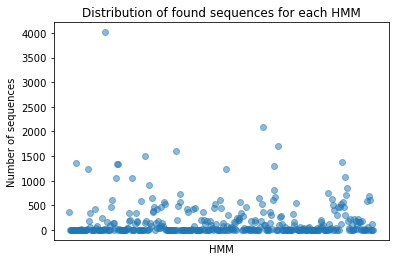

In [85]:
# Plot the distribution of the number of sequences for each HMM
fig = plt.figure(figsize=(6, 4))

hmm_id_counts = new_hmms_df.groupby('hmm_id')['Sequence'].count()

# plt.bar(hmm_id_counts.index, hmm_id_counts.values)
plt.scatter(hmm_id_counts.index, hmm_id_counts.values, alpha=0.5)
# plt.hist(hmm_id_counts, bins=50)

plt.xlabel('HMM')
plt.ylabel('Number of sequences')
plt.title('Distribution of found sequences for each HMM')
plt.xticks([])

plt.show()

In [84]:
hmm_id_counts.describe()

count     383.000000
mean      172.548303
std       363.392756
min         1.000000
25%         1.000000
50%        12.000000
75%       187.500000
max      4016.000000
Name: Sequence, dtype: float64

In [89]:
hmm_id_counts[hmm_id_counts == 4016]

hmm_id
O66493_87-117    4016
Name: Sequence, dtype: int64

In [91]:
new_hmms_df[new_hmms_df['hmm_id'] == 'O66493_87-117']

,E-value,score,bias,exp,N,query_id,hmm_id,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
467587,6.200000e-13,60.6,0.4,1.7,1,O66493,O66493_87-117,D3SNJ2,1,31,31,84,114,31,84,114,31
467588,6.700000e-13,60.5,0.2,1.9,1,O66493,O66493_87-117,O66493,1,31,31,87,117,31,87,117,31
467589,6.800000e-13,60.4,0.5,1.8,1,O66493,O66493_87-117,A0A1M6R3L1,1,31,31,84,114,31,84,114,31
467590,7.600000e-13,60.3,0.6,1.7,1,O66493,O66493_87-117,W0DG83,1,31,31,84,114,31,84,114,31
467591,8.200000e-13,60.2,0.2,1.7,1,O66493,O66493_87-117,A8UVY6,1,31,31,87,117,31,87,117,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471598,9.800000e-03,27.9,3.9,2.4,1,O66493,O66493_87-117,A0A315THI3,3,30,28,85,118,34,84,119,36
471599,9.800000e-03,27.9,3.9,2.4,1,O66493,O66493_87-117,A0A1H0RZA5,3,30,28,85,118,34,84,119,36
471600,9.800000e-03,27.9,2.3,2.3,1,O66493,O66493_87-117,A0A087BGY5,3,31,29,85,118,34,84,118,35
471601,9.800000e-03,27.9,3.7,2.2,1,O66493,O66493_87-117,L0IWW2,3,29,27,88,119,32,87,121,35


## Summarising results
In this section of the notebook, we will examine the distribution of instances: the number of processed and found models decreases at each step, and we need to estimate the amount of information lost. For some proteins, there is no information in the Uniprot BLAST; for others, the ClustalOmega MSA was not generated due to the clusters splitting problem. Some proteins are not found in RP 75%, and the final filtering involves the Pfam database.

In [39]:
# Create a dataframe summarising the number of proteins and the regions at each step
instances_dict = {"Methods": ["Curated DisProt", "Uniprot BLAST", "ClustalOmega", "hmmbuild", "hmmsearch", "Pfam"],
                           "Proteins": [2272, 2271, 2268, 2263, 1971, 1697],
                           "Regions": [3151, 3150, 3147, 3143, 2536, 2153],
                           "% proteins": [100, 99.96, 99.82, 99.6, 86.75, 74.69],
                           "% regions": [100, 99.97, 99.87, 99.75, 80.48, 68.32]}

instances = pd.DataFrame.from_dict(instances_dict)
instances

,Methods,Proteins,Regions,% proteins,% regions
0,Curated DisProt,2272,3151,100.00,100.00
1,Uniprot BLAST,2271,3150,99.96,99.97
2,ClustalOmega,2268,3147,99.82,99.87
3,hmmbuild,2263,3143,99.60,99.75
4,hmmsearch,1971,2536,86.75,80.48
5,Pfam,1697,2153,74.69,68.32


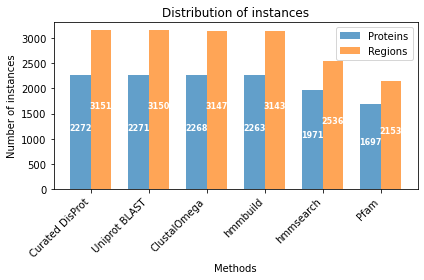

In [40]:
# Plot the distribution of instances
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.35
index = np.arange(len(instances))

bars1 = ax.bar(index, instances["Proteins"], bar_width, label="Proteins", alpha=0.7)
bars2 = ax.bar(index + bar_width, instances["Regions"], bar_width, label="Regions", alpha=0.7)

ax.set_xlabel("Methods")
ax.set_ylabel("Number of instances")
ax.legend()
ax.set_title("Distribution of instances")

for bar, value in zip(bars1, instances["Proteins"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{value}",
             ha="center", va="bottom", fontsize=8, weight = "bold", color="w")

for bar, value in zip(bars2, instances["Regions"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{value}",
             ha="center", va="bottom", fontsize=8, weight = "bold", color="w")

plt.xticks(index + bar_width / 2, instances["Methods"], rotation=45, ha="right")
plt.tight_layout()
plt.show()